In [28]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim 

In [11]:
# generate data (sin waves)
T = 20         
L = 1000        
N = 100         

x = np.empty((N,L),dtype=np.int64)
x[:] = np.arange(L) + np.random.randint(-4*T,4*T,N).reshape(N,1)
data = np.sin(x/1.0/T).astype(np.float64)

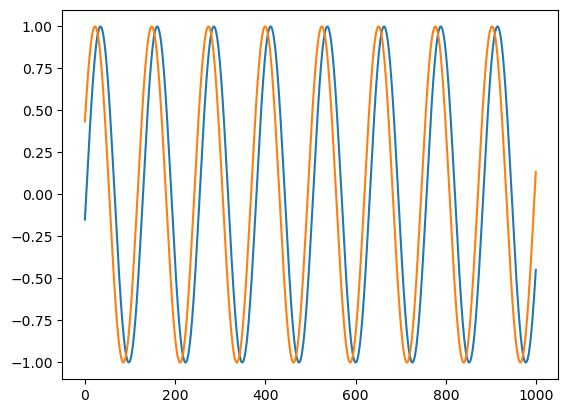

In [27]:
# plot 2 (out of 100)
plt.plot(np.arange(L),data[0])
plt.plot(np.arange(L),data[5])

In [32]:
for input_t in torch.from_numpy(data).split(1,dim=1):
    print(input_t.shape)
    break

torch.Size([100, 1])


In [33]:
# create the LSTM model to predict future
class Sequence(nn.Module):
    def __init__(self,n_hidden=32):
        super().__init__()
        self.n_hidden = n_hidden
        # lstm1, lstm2, linear
        self.lstm1 = nn.LSTMCell(1,self.n_hidden)
        self.lstm2 = nn.LSTMCell(self.n_hidden,self.n_hidden)
        self.linear = nn.Linear(self.n_hidden,1)
        
    def forward(self,x,future=0):
        outputs = []
        n_samples = x.shape(0)
        # initialize h_t,c_t,h_t2,c_t2
        h_t  = torch.zeros(n_samples,self.n_hidden,dtype=torch.double)
        c_t  = torch.zeros(n_samples,self.n_hidden,dtype=torch.double)
        h_t2 = torch.zeros(n_samples,self.n_hidden,dtype=torch.double)
        c_t2 = torch.zeros(n_samples,self.n_hidden,dtype=torch.double)
        
        for input_t in input.split(1,dim=1): # input_t shape = (N,1)
            h_t,c_t   = self.lstm1(input_t,(h_t,c_t))
            h_t2,c_t2 = self.lstm2(h_t,(h_t2,c_t2))
            output = self.linear(h_t2)
            outputs.append(output)
            
        for i in range(future):
            h_t,c_t = self.lstm1(output,(h_t,c_t))
            h_t2,c_t2 = self.lstm2(h_t,(h_t2,c_t2))
            output = self.linear(h_t2)
            outputs.append(output)
            
        outputs = torch.cat(outputs, dim=1)
        return outputs
            